In [ ]:
SpinQit определяет 22 логических квантовых вентиля 
(I, H, X, Y, Z, Rx, Ry, Rz, P, T, Td, S, Sd, CX/CNOT, CY, CZ, U, CP, SWAP, CCX, Ph, CSWAP)
и два специальных вентиля (MEASURE и BARRIER). 
В частности, P — это вентили сдвига фазы, а Ph — это глобальные фазовые вентили.

{'10': 512, '11': 512}


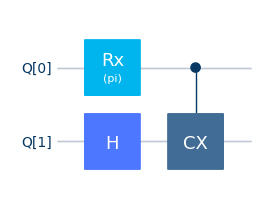

In [9]:
from spinqit import get_basic_simulator, get_compiler, Circuit, BasicSimulatorConfig
from spinqit import H, CX, Rx, view
from math import pi

# Write the program
circ = Circuit()
q = circ.allocateQubits(2)
circ << (Rx, q[0], pi)
circ << (H, q[1])
circ << (CX, (q[0], q[1]))

# Choose the compiler and backend
comp = get_compiler("native")
engine = get_basic_simulator()

# Compile
optimization_level = 0
exe = comp.compile(circ, optimization_level)

#Draw
view.draw (exe)

# Run
config = BasicSimulatorConfig()
config.configure_shots(1024)
result = engine.execute(exe, config)

print(result.counts)